# Домашняя работа 4

## Условие 1: Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:20,.2f}'.format

### 1.1. Скачать данные (недвижимость)

In [2]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### 1.2 Изучите стоимости недвижимости

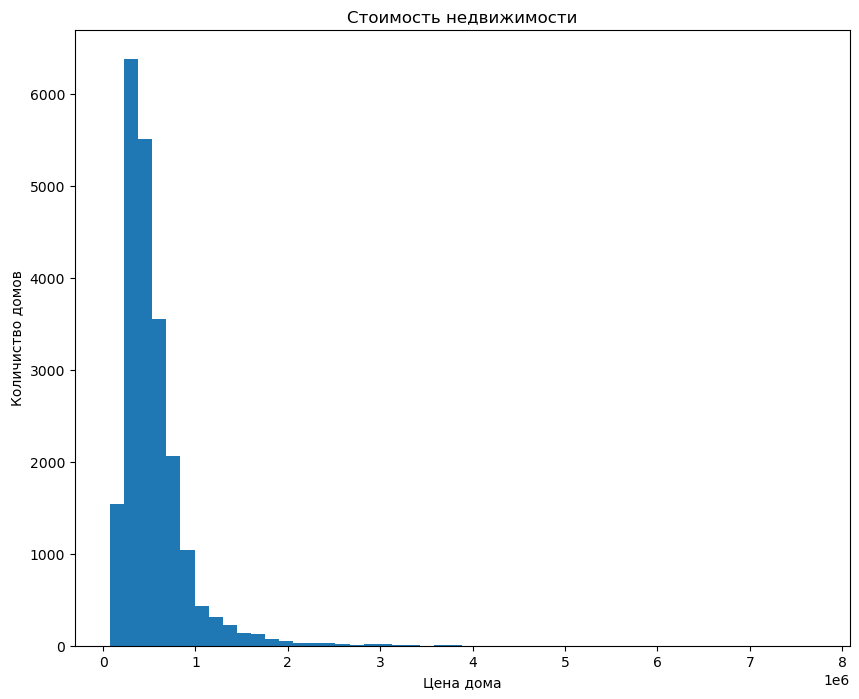

In [3]:
plt.figure(figsize=(10, 8))
plt.hist(df.price, bins=50)
plt.title('Стоимость недвижимости')
plt.xlabel('Цена дома')
plt.ylabel('Количиство домов');

### 1.3 Изучите распределение квадратуры жилой

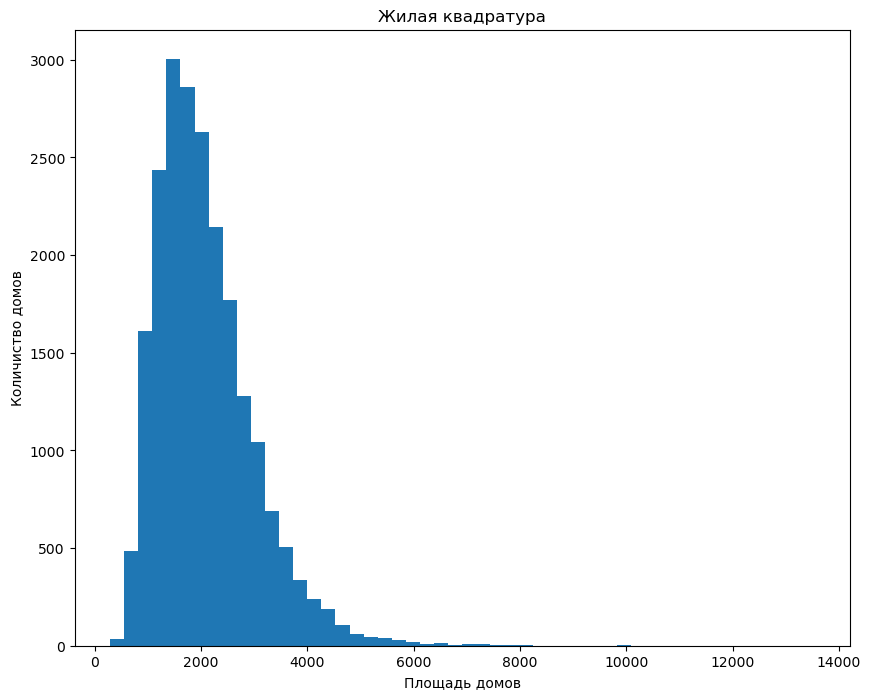

In [4]:
plt.figure(figsize=(10, 8))
plt.hist(df.sqft_living, bins=50)
plt.title('Жилая квадратура')
plt.xlabel('Площадь домов')
plt.ylabel('Количиство домов');

### 1.4 Изучите распределение года постройки

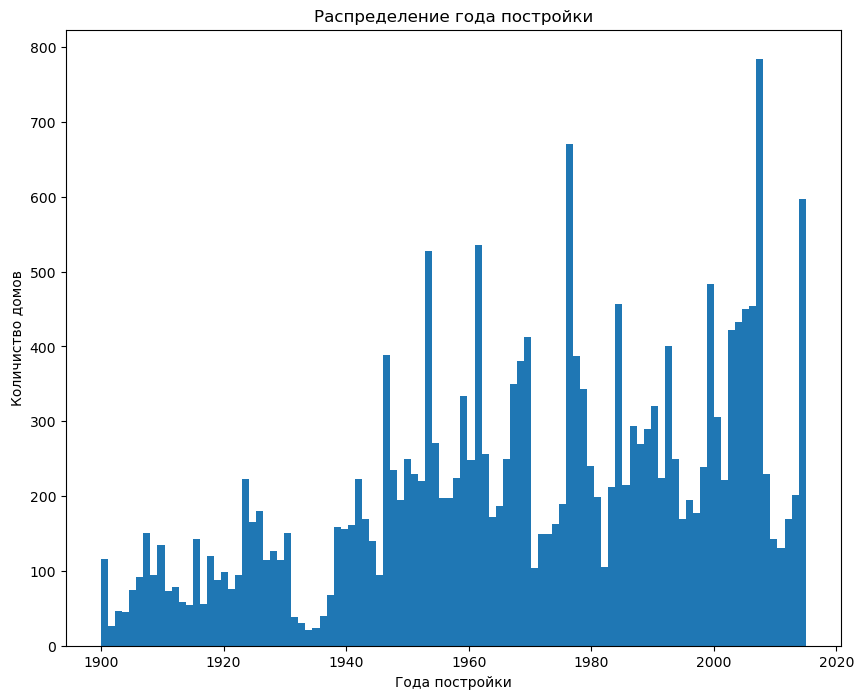

In [5]:
plt.figure(figsize=(10, 8))
plt.hist(df.yr_built, bins=100)
plt.title('Распределение года постройки')
plt.xlabel('Года постройки')
plt.ylabel('Количиство домов');

## Условие 2: 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [6]:
sea_view = df.waterfront.value_counts()
sea_view.index = ['нет', 'да']
sea_view.head()

нет    21450
да       163
Name: waterfront, dtype: int64

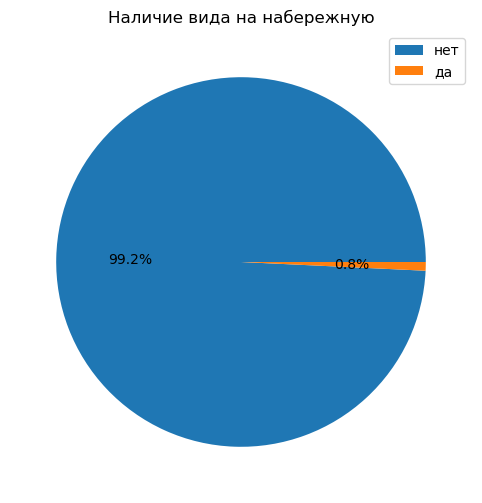

In [7]:
plt.figure(figsize=(10, 6))
plt.pie(sea_view, autopct='%1.1f%%')
plt.title('Наличие вида на набережную')
plt.legend(sea_view.index);

Домов с видом на набережную менее 1% от общего числа недвижимости.

### 2.2 Изучите распределение этажей домов

In [8]:
data = df.floors.value_counts()
data

1.00    10680
2.00     8241
1.50     1910
3.00      613
2.50      161
3.50        8
Name: floors, dtype: int64

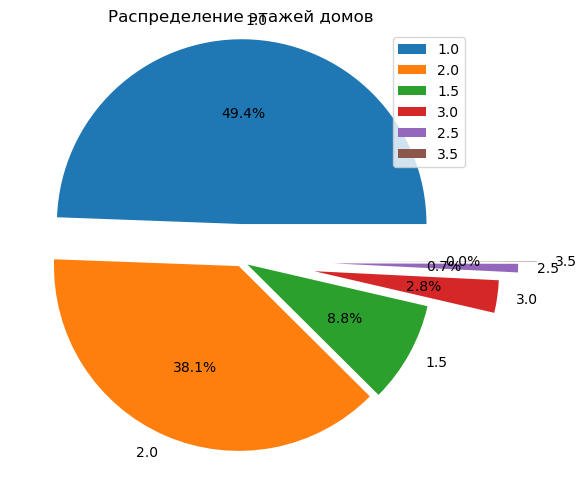

In [9]:
plt.figure(figsize=(10, 6))
expl = [0.2, 0.03, 0.04, 0.4, 0.5, 0.6]
plt.pie(data, autopct='%1.1f%%', labels=data.index, explode=expl)
plt.title('Распределение этажей домов')
plt.legend(data.index);

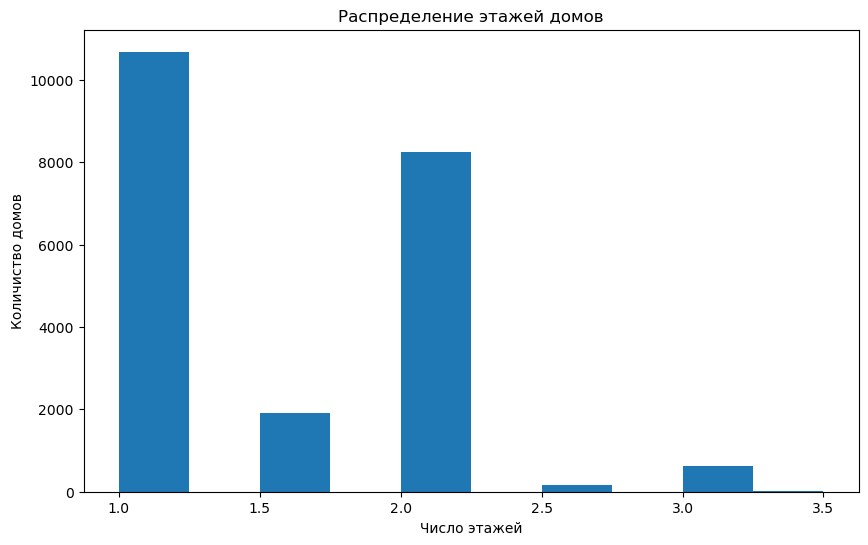

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df.floors)
plt.title('Распределение этажей домов')
plt.xlabel('Число этажей')
plt.ylabel('Количиство домов');

### 2.3 Изучите распределение состояния домов

In [11]:
data = df.grade.value_counts()
data

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

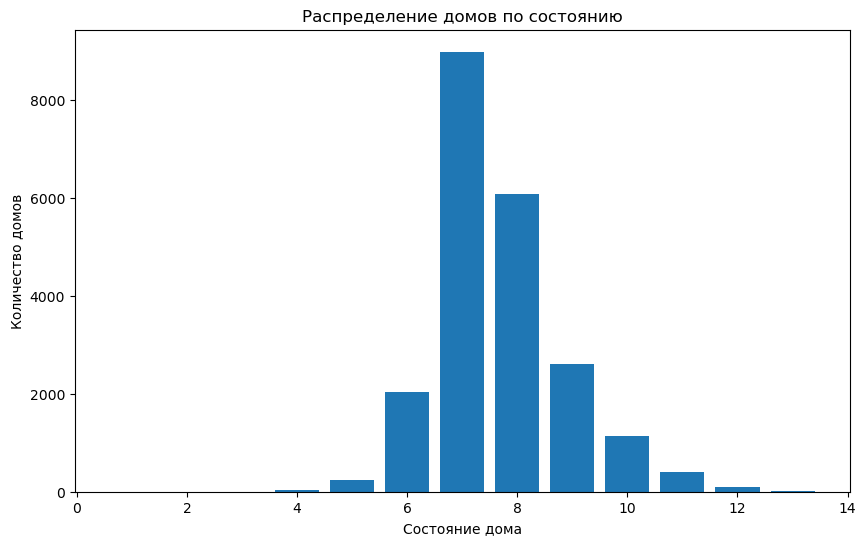

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(data.index, data.values)
plt.title('Распределение домов по состоянию')
plt.xlabel('Состояние дома')
plt.ylabel('Количество домов');

## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

<Figure size 800x600 with 0 Axes>

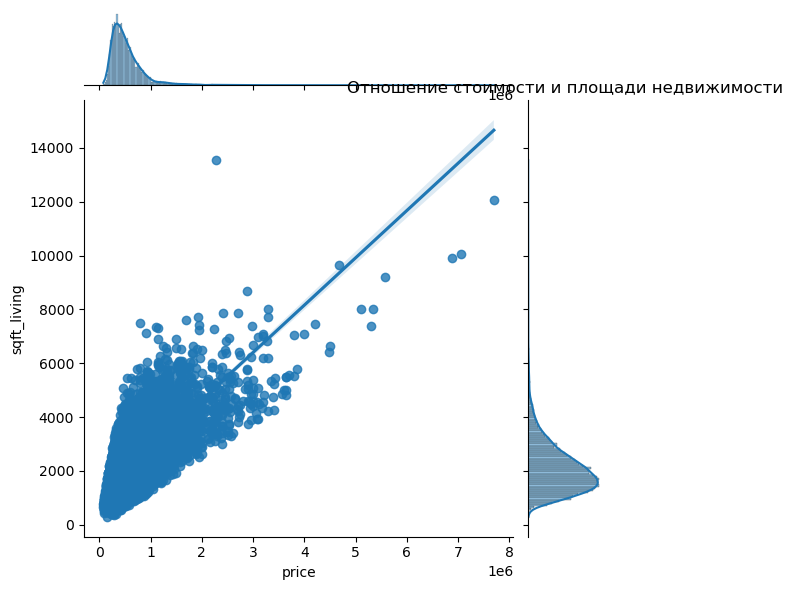

In [13]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=df.price, y=df.sqft_living, kind='reg')
plt.title('Отношение стоимости и площади недвижимости');
plt.show();

Из графика видно, что общая площадь прямо влияет на стоимость недвижимости.

<Figure size 800x600 with 0 Axes>

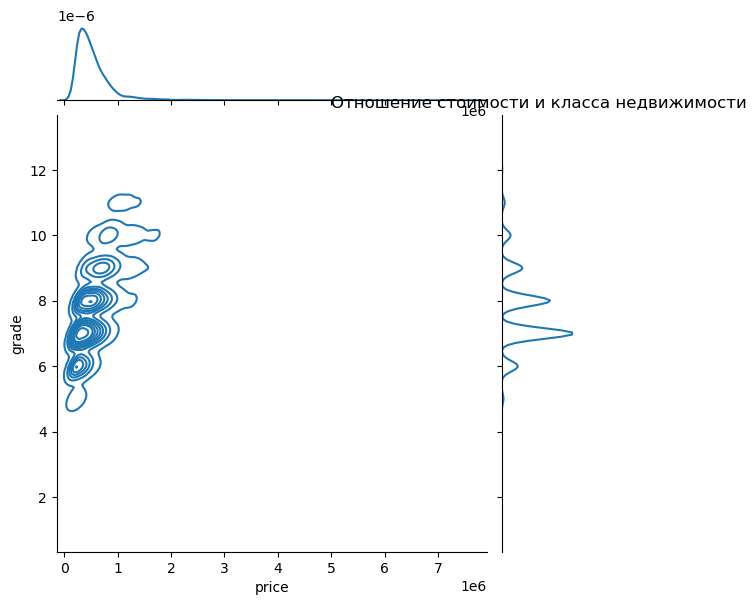

In [14]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=df.price, y=df.grade, kind='kde')
plt.title('Отношение стоимости и класса недвижимости');
plt.show();

Из графика видно, что класс недвижимости прямо влияет на стоимость недвижимости.

<Figure size 800x600 with 0 Axes>

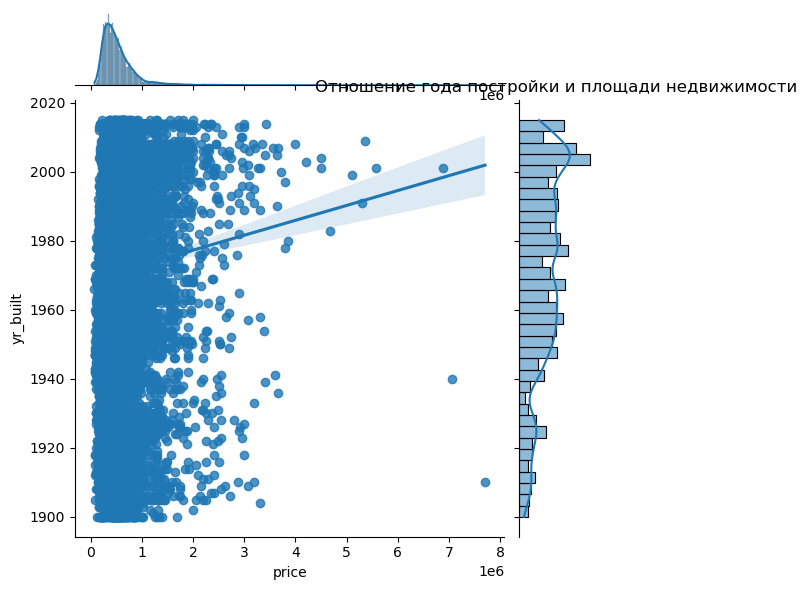

In [15]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=df.price, y=df.yr_built, kind='reg')
plt.title('Отношение года постройки и площади недвижимости');
plt.show();

Из графика видно, что какого-либо влияния года постройки на стоимость недвижимости нет.

<Figure size 800x600 with 0 Axes>

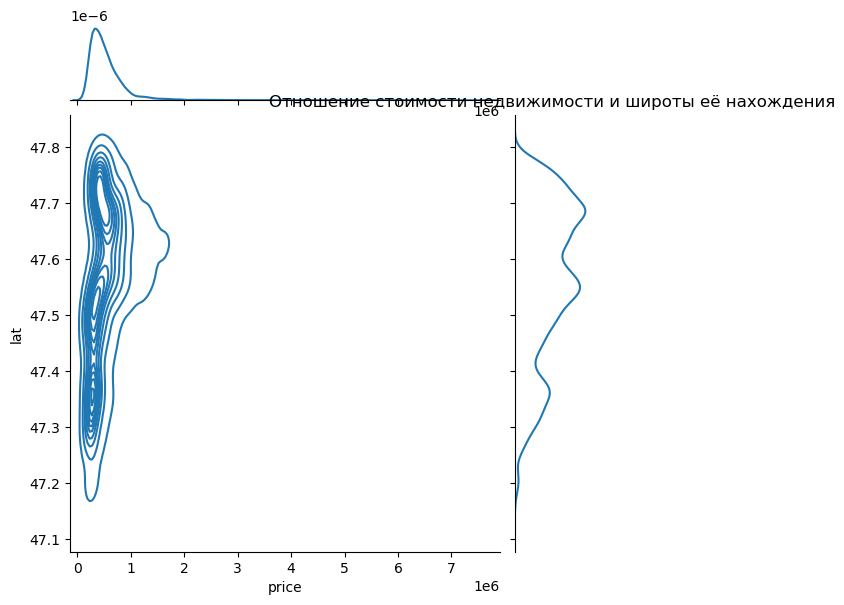

In [16]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=df.price, y=df.lat, kind='kde')
plt.title('Отношение стоимости недвижимости и широты её нахождения');
plt.show();

Из графика видно, что какого-либо влияния широты нахождения дома на стоимость недвижимости нет.

<Figure size 800x600 with 0 Axes>

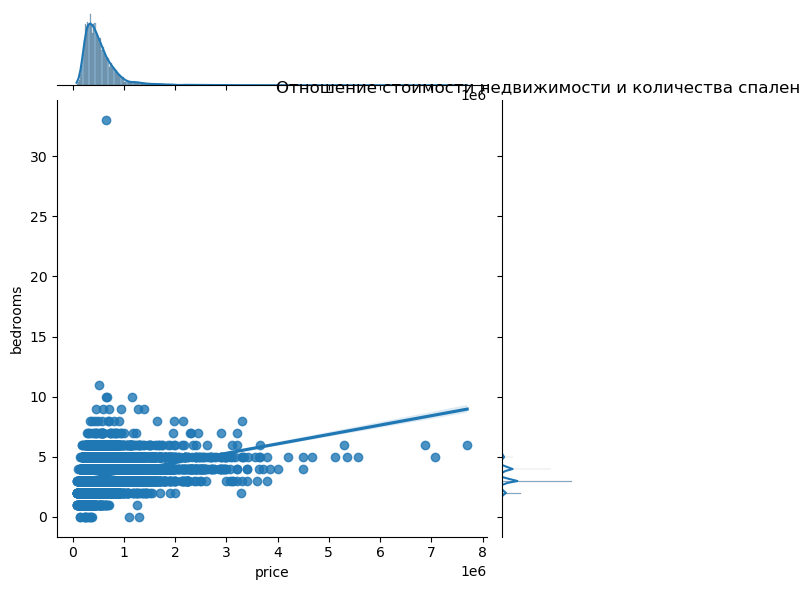

In [17]:
plt.figure(figsize=(8, 6))
sns.jointplot(x=df.price, y=df.bedrooms, kind='reg')
plt.title('Отношение стоимости недвижимости и количества спален');
plt.show();

Из графика видно, что количество спален частично влияет на стоимость недвижимости.